In [1]:
from glob import glob
import matplotlib.pylab as plt
import sys
import os
import tensorflow as tf
import cv2
import numpy as np

model = tf.keras.models.load_model('my_model.keras')


2025-02-24 21:44:06.571278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740433446.743780   95482 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740433446.790802   95482 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-24 21:44:07.143651: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1740433450.130875   95482 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 29

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


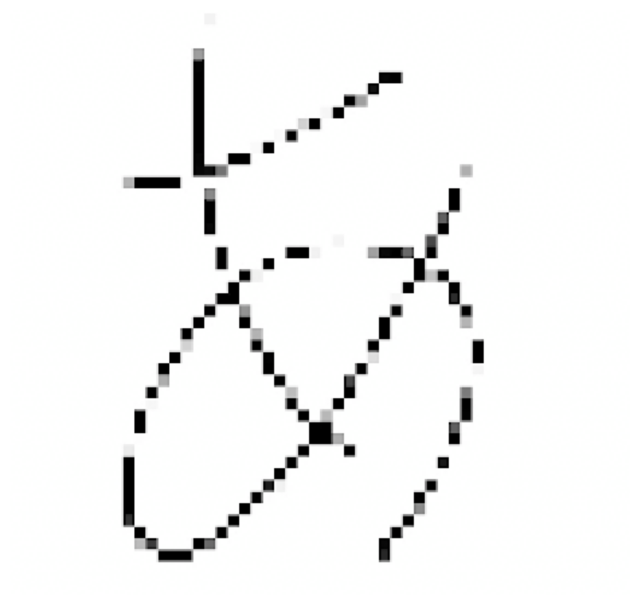

['あ', '参', '益', '膚', '訪', '替', '芬', '放', '咨', '栃']
[0.9989686012268066, 0.0010313522070646286, 1.8291807180048636e-08, 8.641163340428193e-09, 3.6656533364265442e-09, 2.240581054024915e-09, 1.3319690905788661e-09, 1.0617824397485265e-09, 4.5535705761601264e-10, 3.613429000459689e-10]


In [5]:
path = "./a.png"

image = cv2.imread(path)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis('off')

sample = tf.keras.preprocessing.image.load_img(
    path=path,
    color_mode="grayscale",
    interpolation="lanczos",
    target_size=(64, 64),
    keep_aspect_ratio=True
)
sample = tf.keras.preprocessing.image.img_to_array(sample)
sample = sample.reshape((1,64,64,1))

prediction = model.predict(sample)[0]
ind = np.argpartition(prediction, -10)[-10:]

hex_labels = os.listdir("unicode-pictures-dataset/new-modified-dataset/")
temp_hex_labels = sorted([chr(int(x,16)) for x in hex_labels])
q = [temp_hex_labels[i] for i in ind]

plt.show()
print([x for x in reversed(q)])
print([float(prediction[i]) for i in reversed(ind)])
